<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab12_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab12: RNN**

# **What is RNN?**

**Recurrent Neural Network (RNN) is a powerful type of neural network that can make sequential predictions or conclusions based on sequential inputs.**

**It works very well for jobs requiring sequences, such as time series data, voice, natural language, and other activities.**

**Unlike traditional neural networks, the output of recurrent neural networks depends on the prior elements within the sequence.**



<div>
  <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Simple_Recurrent_Neural_Network.png" width=600>
</div>

# **How Does Recurrent Neural Networks Work?**

<div>
  <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Fully_connected_Recurrent_Neural_Network.gif" width=500>
</div>

**The input layer, x, takes in the input to the neural network and processes it and passes it onto the middle layer.**

**The middle layer ‘h’ can consist of multiple hidden layers, each with its own activation functions and weights and biases. If you have a neural network where the various parameters of different hidden layers are not affected by the previous layer, ie: the neural network does not have memory, then you can use a recurrent neural network.**

**The Recurrent Neural Network will standardize the different activation functions and weights and biases so that each hidden layer has the same parameters. Then, instead of creating multiple hidden layers, it will create one and loop over it as many times as required.**

**Note that the same function and the same set of parameters are used at every time step.**

**We can epxress this process mathematically:**

<div>
  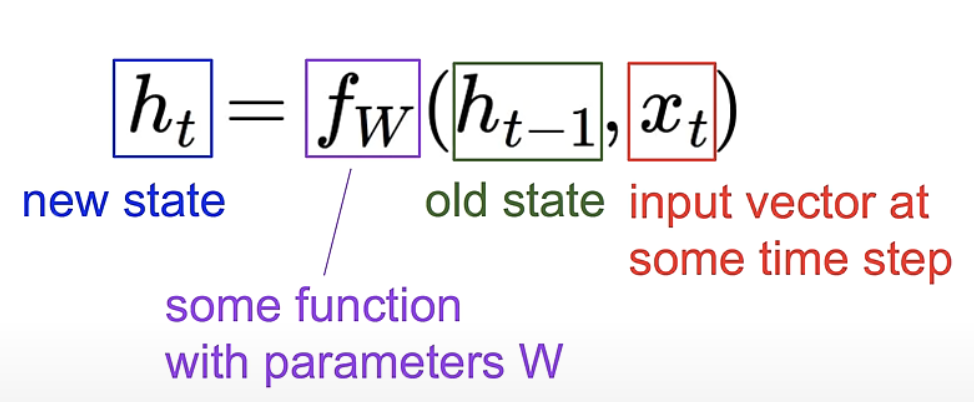
</div>

**Also, the vanilla RNN, which is the state consists of a single hidden vector, h, can be represented:**

$$
h_t = tanh(W_{hh}h_{t-1}+W_{xh}x_t)
$$
$$
y_t=W_{hy}h_t
$$

reference: https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn
https://www.ibm.com/topics/recurrent-neural-networks

# **hello RNN**

**Let's make a character-level language model example.**

**As I explained above, RNN predicts the output. For this characteristic it is used for natural language processing.**

**We can try the example training sequence, "hello"**

**The model will predict the next alphabet; for example, the input h will have the output e, and the input e will have the output l.**

**First, we need to encode the string using one hot encode.**

<div>
  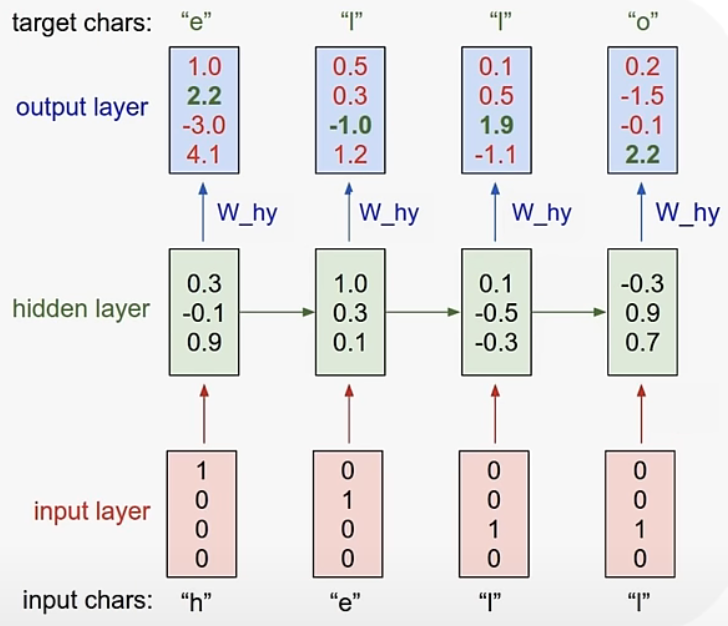
</div>

In [3]:
# Lab 12 RNN
import numpy as np
import tensorflow as tf

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
# x_data = [[0, 1, 0, 2, 3, 3]]  # hihell
y_data = [[1, 0, 2, 3, 3, 4]]  # ihello

num_classes = 5
input_dim = 5  # one-hot size, same as hidden_size to directly predict one-hot
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
                       [0, 1, 0, 0, 0],    # i 1
                       [1, 0, 0, 0, 0],    # h 0
                       [0, 0, 1, 0, 0],    # e 2
                       [0, 0, 0, 1, 0],    # l 3
                       [0, 0, 0, 1, 0]]],  # l 3
                     dtype=np.float32)

y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
print(x_one_hot.shape)
print(y_one_hot.shape)

tf.model = tf.keras.Sequential()

(1, 6, 5)
(1, 6, 5)


In [4]:
# make cell and add it to RNN layer
# input_shape = (1,6,5) => number of sequence (batch), length of sequence, size of input dim
cell = tf.keras.layers.LSTMCell(units=num_classes, input_shape=(sequence_length, input_dim))
tf.model.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))
# single LSTM layer can be used as well instead of creating LSTMCell
# tf.model.add(tf.keras.layers.LSTM(units=num_classes, input_shape=(sequence_length, input_dim), return_sequences=True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py:115: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# fully connected layer
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])

In [ ]:
# train
tf.model.fit(x_one_hot, y_one_hot, epochs=50)
tf.model.summary()

predictions = tf.model.predict(x_one_hot)
for i, prediction in enumerate(predictions):
    print(prediction)
    # print char using argmax, dict
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str))

(505, 7, 5)
(505, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30 (120.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


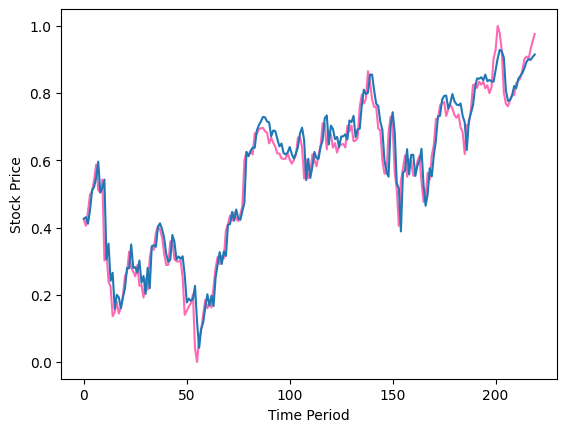

In [2]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]  # Next close price
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape)  # (505, 7, 5)
print(trainY.shape)

tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations, verbose=0)


# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY, c="hotpink")
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()